In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

# 1. Định nghĩa class MyPCA

In [2]:
class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X):
        # 1) Tâm dữ liệu
        self.mean_ = np.mean(X, axis=0)
        Xc = X - self.mean_
        # 2) Ma trận hiệp phương sai
        n_samples = X.shape[0]
        C = np.dot(Xc.T, Xc) / (n_samples - 1)
        # 3) Tính trị riêng và vector riêng
        eigvals, eigvecs = np.linalg.eigh(C)
        # 4) Sắp xếp giảm dần
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        # 5) Chọn số thành phần
        if self.n_components is not None:
            eigvals = eigvals[:self.n_components]
            eigvecs = eigvecs[:, :self.n_components]
        # 6) Lưu kết quả
        self.components_ = eigvecs.T
        self.explained_variance_ = eigvals
        self.total_var_ = np.sum(np.linalg.eigvalsh(C))  # Total variance
        self.explained_variance_ratio_ = eigvals / self.total_var_
        self.cumulative_explained_variance_ = np.cumsum(self.explained_variance_ratio_)
        
        return self
    
    def transform(self, X):
        Xc = X - self.mean_

        return np.dot(Xc, self.components_.T)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [ ]:
# Scree plot
def scree_plot(pca, color='ro-'):
    plt.figure(figsize=(6,5))
    plt.plot(pca.explained_variance_ratio_, color, linewidth=2)
    plt.title('Scree Plot')
    plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_) + 1))
    plt.xlabel('Principal Components')
    plt.ylabel('Eigenvalues')
    plt.show()

# 2. Thử PCA trên Iris dataset

In [3]:
iris = datasets.load_iris()
X_iris = iris.data  
y_iris = iris.target

In [4]:
# 1 số thông tin của dataset
print("Thông tin chung về bộ dữ liệu Iris:")
print("Số mẫu (dòng):", X_iris.shape[0])
print("Số đặc trưng (cột):", X_iris.shape[1])
print("Các lớp:", np.unique(y_iris))
print("Số lượng mẫu mỗi lớp:", np.bincount(y_iris))

print("\nTên các đặc trưng:")
for i, name in enumerate(iris.feature_names):
    print(f"  {i+1}. {name}")

print("\n5 mẫu đầu tiên:")
df = pd.DataFrame(X_iris, columns=iris.feature_names)
df['target'] = y_iris
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

print("\nThống kê mô tả:")
print(df[iris.feature_names].describe()) 

Thông tin chung về bộ dữ liệu Iris:
Số mẫu (dòng): 150
Số đặc trưng (cột): 4
Các lớp: [0 1 2]
Số lượng mẫu mỗi lớp: [50 50 50]

Tên các đặc trưng:
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

5 mẫu đầu tiên:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Thống kê mô tả:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean

In [5]:
# Chuẩn hóa 
X_iris_std = (X_iris - X_iris.mean(axis=0)) / X_iris.std(axis=0)

In [6]:
# xác định số thành phần chính
k = 4

In [7]:
# Áp dụng MyPCA lấy k thành phần
my_pca = MyPCA(n_components=k)
X2_iris = my_pca.fit_transform(X_iris_std)

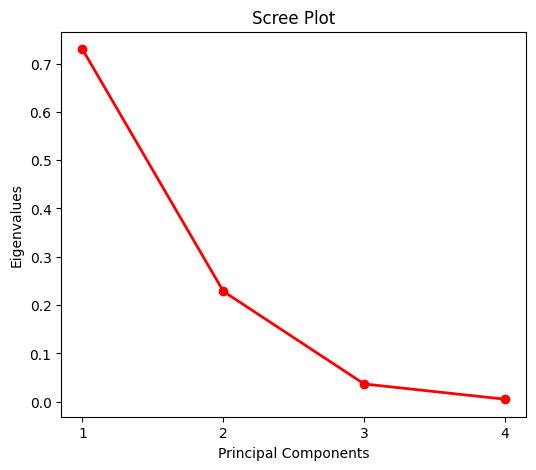

In [9]:
scree_plot(my_pca)

In [10]:
# In EVR / CEVR
print("EVR:", my_pca.explained_variance_ratio_)
print("CEVR:", my_pca.cumulative_explained_variance_)

EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


# 3. So sánh với PCA của skitlearn

In [11]:
from sklearn.decomposition import PCA

In [12]:
sklearn_pca = PCA(n_components=k)
X2_iris_sklearn = sklearn_pca.fit_transform(X_iris_std)

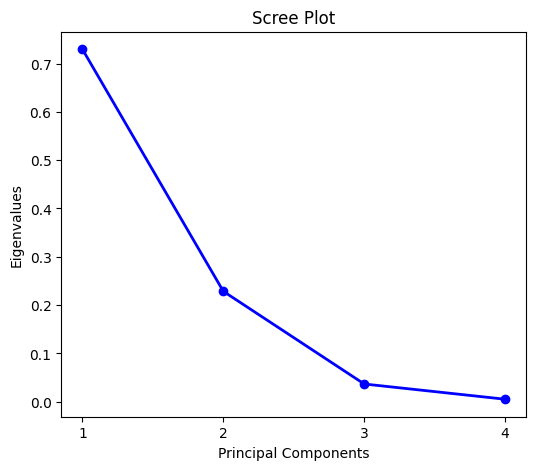

In [13]:
scree_plot(sklearn_pca, 'bo-')

In [14]:
# so sanh 2 PCA
print("Sklearn PCA:")
print("EVR:", sklearn_pca.explained_variance_ratio_)
print("CEVR:", np.cumsum(sklearn_pca.explained_variance_ratio_))
print("MyPCA:")
print("EVR:", my_pca.explained_variance_ratio_)
print("CEVR:", my_pca.cumulative_explained_variance_)



Sklearn PCA:
EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]
MyPCA:
EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


## Kết luận
- Dựa trên kết quả so sánh, ta thấy rằng PCA tự cài đặt và PCA của sklearn cho ra các giá trị explained variance ratio (EVR) và cumulative explained variance ratio (CEVR) giống hệt nhau.
- Điều này cho thấy việc cài đặt PCA thủ công là chính xác và cho kết quả tương đương với thư viện sklearn. 
- Như vậy, ta có thể tin tưởng vào cả hai phương pháp khi áp dụng PCA cho bộ dữ liệu này.
